<a href="https://colab.research.google.com/github/pras5449/-Assignment-Task-6/blob/main/Assignment8_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("/content/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.shape

(804, 12)

# **Tasks, Part 1**

**1. Find the linear regression equation for mileage vs price.**

In [ ]:
x = df[['Mileage']]
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.20)

In [ ]:
x_train.shape, y_train.shape

((643, 1), (643,))

In [ ]:
x_test.shape, y_test.shape

((161, 1), (161,))

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
reg.coef_, reg.intercept_

(array([-0.19742874]), 25006.576843062376)

Equation = y = mx + c  
Formula : Price = 25006.576 * Mileage - 0.19742874

**2. Chart the original data and the equation on the chart.**

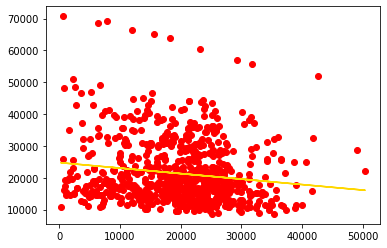

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, reg.predict(x),color='gold')
plt.show()

**3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
reg.score(x_train, y_train)

0.029349901027794667

In [ ]:
df.corr()['Price']

Price       1.000000
Mileage    -0.143051
Cylinder    0.569086
Liter       0.558146
Doors      -0.138750
Cruise      0.430851
Sound      -0.124348
Leather     0.157197
Name: Price, dtype: float64

# **Tasks, Part 2**

**1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
input = df[["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]]
target = df["Price"]

In [ ]:
reg = LinearRegression().fit(input, target)
reg.coef_, reg.intercept_

(array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
         6.28899715e+03, -1.99379528e+03,  3.34936162e+03]), 6758.755143598106)

In [ ]:
reg.score(input, target)

0.4462643536728379

**3.Find the combination of the factors that is the best predictor for price.**

In [ ]:
# To know more about preprocessing technique
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [ ]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
Car_Features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
Car_Price = ["Price"]
X = df[Car_Features]
Y = df[Car_Price]

In [ ]:
from itertools import combinations

combos = []
   
for i in range(1, 7):
    combos.append(combinations(Car_Features, i))

check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = Pipeline([
                    ('poly', PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
        model = model.fit(x,Y)
        model_score = model.score(x, Y)
        if check_score < model.score(x, Y):
            check_score = model.score(x, Y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, 'model_score =', check_score)


7 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] model_score = 0.9097847608829751
